In [1]:
!pip install graphviz
!pip install pydot
!pip install --upgrade scikit-learn==0.22

In [125]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydot
from numpy import argmax
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

* Baixando base do ENEM 2019

In [3]:
enem = pd.read_csv('MICRODADOS_ENEM_2019.csv',encoding='latin-1', sep = ";")

In [4]:
pd.set_option('display.max_columns', None)
enem.head(5)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,4,NaN,NaN,NaN,NaN,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,504.0,509.0,514.0,516.0,472.9,466.0,497.3,369.1,DECCEBAECBDADCDBBACEBECCBECBECDDDCBCAADBEDCDA,CCBCAEDAAECEDABEDAAADEDBBEDACDCDDCBBCCEBBAACB,DBBCB99999BDCCDBBABBAAADCBEBAEBBAAEBCCCABDCCBA...,ADBBDEDCABCEDCACBECDCCEBCCDBEBDCEDDBCDBCCDECC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,160.0,160.0,140.0,160.0,780.0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,1,1505502.0,Paragominas,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504059,Mãe do Rio,15,PA,1,1,1,1,506.0,510.0,513.0,517.0,358.9,495.4,482.3,416.5,DAEDEBDCDEBAAACDADABDACABECDAEAAAADCEBBADEBDE,CEACBBDEEABDDACADDAABCEAEEDEEBCACEDBBDBBDBACE,99999ADBEAEBDACDAADEBBDABAEADCDDACABCCAABEEAEE...,DACCCBDCCCBACCCCEEEBBBEACCAABDBACDCAECABCCDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,120.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,1,1505502.0,Paragominas,15.0,PA,2,0,3,1.0,0,15230023.0,1505502.0,Paragominas,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1505502,Paragominas,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,AABDAECAECECCBCBDECCCBCDBBABABADACBDEADEDABEE,ABACCEABCDADABACBBCEACDACDBBEEBACABBAEACAADCE,ADBBC99999EDBCBBAACECCDCDAACECAABCDCCEDEBAECEA...,DECCABCBCDBBBEAECBDBBCDDAADEBCBCACBBEDADDEEAC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCE

# Selecionando Dados

* Selecionando algumas variáveis dos estudantes e a nota da prova de ciencias da natureza (NU_NOTA_CN)

In [5]:
df = enem[['TP_COR_RACA','SG_UF_RESIDENCIA','TP_ESCOLA','NU_NOTA_CN','Q005','Q006','Q025']]

In [6]:
len(df)

5095270

In [7]:
df.isna().sum()

TP_COR_RACA               0
SG_UF_RESIDENCIA          0
TP_ESCOLA                 0
NU_NOTA_CN          1384837
Q005                      0
Q006                      0
Q025                      0
dtype: int64

In [8]:
# Excluindo observacoes sem nota na prova
df = df.dropna()

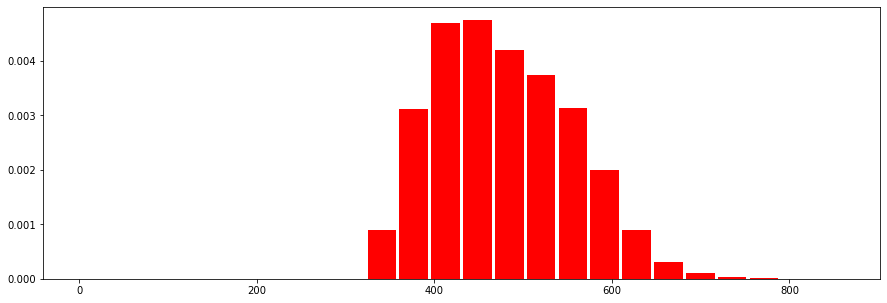

In [9]:
#Verificando a distribuicao das notas
minimo = df.NU_NOTA_CN.min()
maximo = df.NU_NOTA_CN.max()

bins = np.linspace(minimo, maximo,25)

plt.figure(figsize=(15,5))

plt.hist( df.NU_NOTA_CN, bins = bins, color = 'r', density=True, rwidth=0.9)

plt.show()

In [10]:
#Quantis das notas
df['NU_NOTA_CN'].quantile([.1,.5,.75,0.9])

0.10    383.3
0.50    470.3
0.75    533.2
0.90    581.9
Name: NU_NOTA_CN, dtype: float64

In [11]:
df['TP_ESCOLA'].value_counts()

1    2491265
2    1011739
3     207429
Name: TP_ESCOLA, dtype: int64

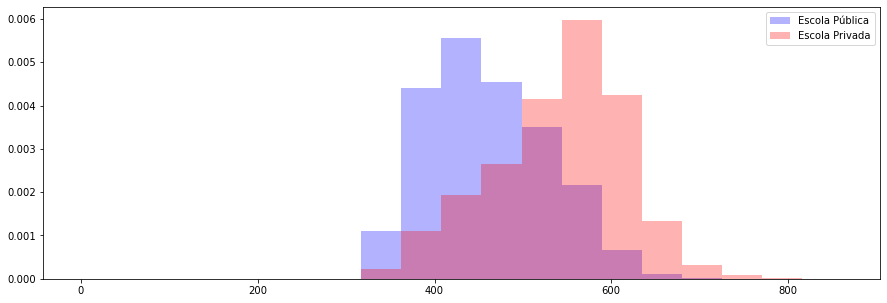

In [12]:
minimo = df.NU_NOTA_CN.min()
maximo = df.NU_NOTA_CN.max()

bins = np.linspace(minimo,maximo,20)

plt.figure(figsize=(15,5))
plt.hist( df[df['TP_ESCOLA']==2].NU_NOTA_CN, bins=bins, color='b', alpha=.3, density=True, label='Escola Pública' )
plt.hist( df[df['TP_ESCOLA']==3].NU_NOTA_CN, bins=bins, color='r', alpha=.3, density=True, label='Escola Privada' )

plt.legend()
plt.show()

In [13]:
df['Q025'].value_counts()

B    2926301
A     784132
Name: Q025, dtype: int64

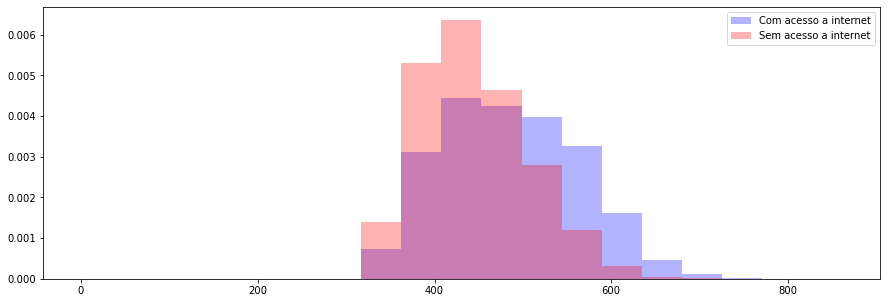

In [14]:
plt.figure(figsize=(15,5))
plt.hist( df[df['Q025']=='B'].NU_NOTA_CN, bins=bins, color='b', alpha=.3, density=True, label='Com acesso a internet' )
plt.hist( df[df['Q025']=='A'].NU_NOTA_CN, bins=bins, color='r', alpha=.3, density=True, label='Sem acesso a internet' )

plt.legend()
plt.show()

# Árvore de Classificação

* Modelo de Árvore utilizado para problemas envolvendo predição de ocorrência de variáveis categóricas
* Envolve agregar as observações em grupos mais homogêneos possíveis (presença majoritária de uma das categorias) através da subdivisão do espaço das variáveis

In [15]:
#Cria categoria de notas acima ou menor/igual a 550, proximo ao terceiro quartil
df['>550'] = np.where(df['NU_NOTA_CN'] > 550, 'Acima de 550', 'Abaixo de 550')

* Nosso evento categorico de interesse será se o aluno tirou mais do que 550 na prova 

In [16]:
df['>550'].value_counts()

Abaixo de 550    2999362
Acima de 550      711071
Name: >550, dtype: int64

### Árvore como método exploratório

* Inicialmente, podemos utilizar esse método para explorar se a ocorrência das categorias esta associada a determinado perfil, descrito pelas variáveis explicativas
* Neste caso, como não faremos predições, não se aplica todos os procedimentos necessarios para treino, teste e otimização dos resultados do algoritmo

In [17]:
#Variável resposta
df_dep = df[['>550']]
#Variaveis explicativas
df_indep = df[['TP_COR_RACA','SG_UF_RESIDENCIA','TP_ESCOLA','Q005','Q006','Q025']]

In [18]:
df_indep.head()

,TP_COR_RACA,SG_UF_RESIDENCIA,TP_ESCOLA,Q005,Q006,Q025
0,3,PA,1,7,B,A
1,3,PA,1,5,B,A
2,1,PA,3,3,C,B
5,1,PA,1,5,C,A
6,3,PA,1,4,C,B


In [19]:
# de-para das variáveis
cor_raca = {
    0 : 'Cor_Raca_Não_informado',
    1 : 'Cor_Raca_Branca',
    2 : 'Cor_Raca_Preta',
    3 : 'Cor_Raca_Parda',
    4 : 'Cor_Raca_Amarela',
    5 : 'Cor_Raca_Indígena',
}
tipo_escola = {
    1 : 'Escola_Não_respondeu',
    2 : 'Escola_Pública',
    3 : 'Escola_Privada',
    4 : 'Escola_Exterior',
}
acesso_internet = {
    'A' : 'Acesso_internet_Não',
    'B' : 'Acesso_internet_Sim',
}
#ponto médio das faixas de renda familiar, assim, podemos usá-la como variáveis quantitativa
renda_familiar = {
    'A' : 0,
    'B' : 499,
    'C' : 1247,
    'D' : 1746,
    'E' : 2245,
    'F' : 2744,
    'G' : 3493,
    'H' : 4491,
    'I' : 5489,
    'J' : 6487,
    'K' : 7485,
    'L' : 8483,
    'M' : 9481,
    'N' : 10978,
    'O' : 13473,
    'P' : 17465,
    'Q' : 19960
}

In [20]:
#aplicando de-para
df_indep['TP_COR_RACA'] = df_indep['TP_COR_RACA'].map(cor_raca)
df_indep['TP_ESCOLA'] = df_indep['TP_ESCOLA'].map(tipo_escola)
df_indep['Q025'] = df_indep['Q025'].map(acesso_internet)
df_indep['Q006'] = df_indep['Q006'].map(renda_familiar)

C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [21]:
df_indep['Q005'] = 'Mora_com' + '_' + (df.Q005.astype('str')) + '_' +'pessoas'

C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_indep.dtypes

TP_COR_RACA         object
SG_UF_RESIDENCIA    object
TP_ESCOLA           object
Q005                object
Q006                 int64
Q025                object
dtype: object

In [23]:
for x in (df_indep.select_dtypes(include=['object']).columns.tolist()):
    print(x)

TP_COR_RACA
SG_UF_RESIDENCIA
TP_ESCOLA
Q005
Q025


* One Hot encoding para variáveis qualitativas

In [24]:
for x in (df_indep.select_dtypes(include=['object']).columns.tolist()):
    one_hot = pd.get_dummies(df_indep[x])
    df_indep = df_indep.drop(x,axis = 1)
    df_indep = df_indep.join(one_hot)

In [25]:
df_indep.head()

,Q006,Cor_Raca_Amarela,Cor_Raca_Branca,Cor_Raca_Indígena,Cor_Raca_Não_informado,Cor_Raca_Parda,Cor_Raca_Preta,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,Escola_Não_respondeu,Escola_Privada,Escola_Pública,Mora_com_10_pessoas,Mora_com_11_pessoas,Mora_com_12_pessoas,Mora_com_13_pessoas,Mora_com_14_pessoas,Mora_com_15_pessoas,Mora_com_16_pessoas,Mora_com_17_pessoas,Mora_com_18_pessoas,Mora_com_19_pessoas,Mora_com_1_pessoas,Mora_com_20_pessoas,Mora_com_2_pessoas,Mora_com_3_pessoas,Mora_com_4_pessoas,Mora_com_5_pessoas,Mora_com_6_pessoas,Mora_com_7_pessoas,Mora_com_8_pessoas,Mora_com_9_pessoas,Acesso_internet_Não,Acesso_internet_Sim
0,499,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,499,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1247,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5,1247,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,1247,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


* Ajustando uma arvore com profundidade maxima de 03 e 20 observações mínimas para realizar uma divisão de um nó

In [26]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split = 20)
clf = clf.fit(df_indep,df_dep)

*  *Plotando a árvore construida*
    * Analisando as variáveis selecionadas p/ divisão das observações
        * A variável renda (Q6) foi seguidamente, durante as primeiras duas divisões, empregada para segmentar os dados, em que, quanto menor a faixa de renda, maior a proporção de menores notas
        * Na sequência, o tipo da escola (pública/privada) e o acesso a internet também subdividiram os dados
        * Por fim, observa-se que a maior concentração de notas menores que 550 esta em alunos de menor renda e, observando em grupos comparáveis nesta variável, também na característica de ser de escola pública.
    * Analisando o ganho de informação com cada divisão
        * O Indice Gini inicial dos dados é 0.31 e, com a primeira divisão, reduz-se esse valor a 0.27, com ganho de informação
            * Na sequencia da divisão à esquerda, reduz-se o Gini de 0.206 para 0.200
                * Das divisões oriundas dessa segmentação (Internet e Escola Privada), ambas geram redução do Gini
            * Na primeira divisão à direita, mais orientada a proporções maiores de notas acima de 550, reduz-se o indicador de 0.491 para 0.468.
                * Destaque que aqui temos o primeiro grupo com maioria de observações da classe de notas acima de 550
                * As segmentações sequentes reduzem o Gini.
        * O Gini final da árvore, ponderando pelo % de observações de cada grupo final, é 0.259, menor que o inicial do conjunto

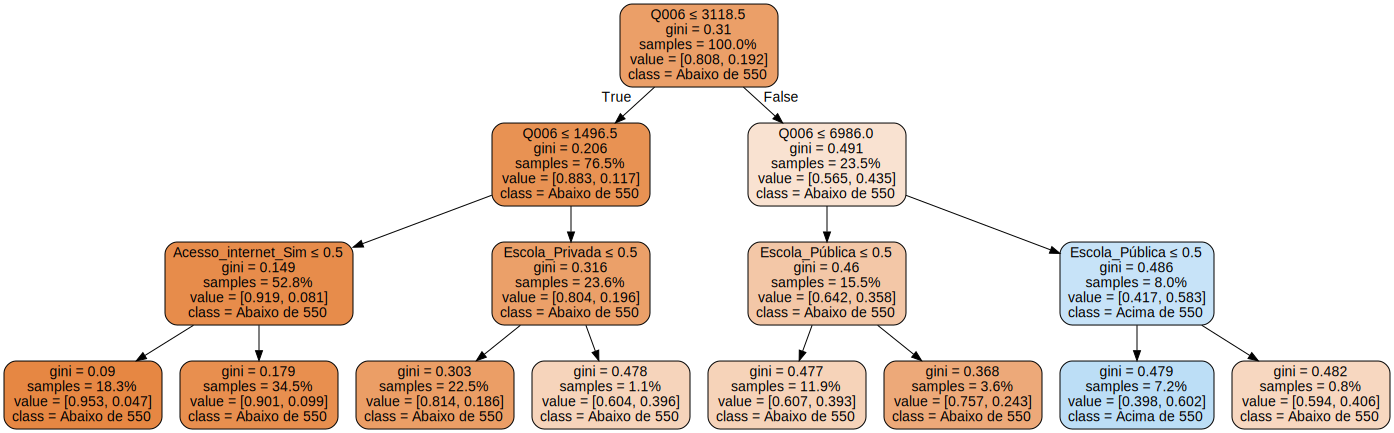

In [27]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
          feature_names=df_indep.columns.values,  
          class_names=df_dep['>550'].unique(),  
          filled=True, rounded=True,  
          special_characters=True, proportion=True)  
graph = graphviz.Source(dot_data)  
graph

### Árvore como metodo preditivo

* Nesta circunstância, queremos utilizar a árvore de classificação para realizar predições posteriores, assim, necessitaremos aplicar processos de treino, teste e otimização do algoritmo

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

In [29]:
df_dep['>550'] = np.where(df['NU_NOTA_CN'] > 550, 1, 0)

C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


* Separando a base em treino (70%) e teste (30%)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_indep, df_dep, test_size=0.3, random_state=42)

* Ajuste do Hiperparâmetro:
    * Neste caso, ajustaremos a profundidade máxima da árvore como hiperparâmetro, testando de 2 até 7, além do método de cálculo da qualidade da separaçao (gini ou entropia)
    * Em cada iteração para encontrar o melhor hiperparâmetro, calcularemos as métricas avaliativas: f1_score e ROC AUC Score
        * F1_score: Média harmônica entre o precision e o recall do modelo:
            * Precision: % das previsões positivas do modelo que realmente são positivas
            * Recall: Dos casos positivos da base, quanto % o modelo acertou que são positivas
        * ROC AUC Score: Área sob a curva ROC, mensura o quão bem o modelo esta identificando os verdadeiros positivos sem elevar os falsos positivos

In [31]:
parametro = {'max_depth':np.arange(2, 7,1), 'criterion': ['gini','entropy'],}
scoring = {'AUC': 'roc_auc', 'f1': 'f1'}

* A escolha da variável que irá dividir o nó será realizada com base na divisão que gerar os grupos mais homogêneos (splitter = 'best')

In [32]:
clf = tree.DecisionTreeClassifier(splitter = 'best', random_state=42)

In [33]:
#Iterando (cross-validation) para obter o melhor hiperparâmetro com base na métrica do ROC AUC Score
clf = GridSearchCV(clf, parametro, scoring= scoring, refit = 'AUC', cv=10, n_jobs=-1)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [34]:
# A profundidade máxima e critério que resulta no maior ROC AUC Score (0.773) é de 6 - entropia
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'max_depth': 6}
0.7739053407363337


* Informacoes das iterações com as métricas em cada split 

In [35]:
resultados = clf.cv_results_
resultados = pd.DataFrame.from_dict(resultados)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,split5_test_AUC,split6_test_AUC,split7_test_AUC,split8_test_AUC,split9_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,63.976807,4.117506,1.383299,0.635678,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.741238,0.735024,0.740449,0.741085,0.740412,0.739273,0.738745,0.740474,0.739804,0.739650,0.739615,0.001699,10,0.345954,0.310964,0.342847,0.380686,0.342911,0.344763,0.343795,0.378711,0.380410,0.344501,0.351554,0.020986,7
1,41.492799,16.593197,1.427181,0.829254,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.756362,0.750107,0.755504,0.756533,0.755378,0.754711,0.753806,0.755613,0.755263,0.755362,0.754864,0.001745,8,0.332149,0.298254,0.328529,0.251986,0.328995,0.329868,0.329991,0.251001,0.252382,0.344501,0.304765,0.036345,9
2,41.247240,1.086701,1.157703,0.172963,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.763966,0.759398,0.763395,0.763666,0.762938,0.762179,0.761258,0.762800,0.761577,0.762269,0.762345,0.001285,6,0.334505,0.302431,0.330627,0.367037,0.331540,0.332337,0.332167,0.396847,0.367817,0.333222,0.342853,0.025342,8
3,48.790856,1.284127,1.024359,0.050795,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.770097,0.766199,0.769135,0.769978,0.769695,0.768640,0.767261,0.769439,0.767958,0.768375,0.768678,0.001196,4,0.367913,0.332775,0.364404,0.357572,0.364028,0.364820,0.365359,0.337014,0.358968,0.367945,0.358080,0.012054,4
4,55.118327,0.766540,1.070336,0.078729,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.774112,0.770957,0.773553,0.774010,0.774054,0.773292,0.771881,0.773434,0.772745,0.772639,0.773068,0.000976,2,0.370398,0.366282,0.335517,0.362515,0.364960,0.366616,0.336226,0.364438,0.363239,0.339775,0.356997,0.013176,5


* Variação das métricas conforme as profundidades máximas e o critério de split

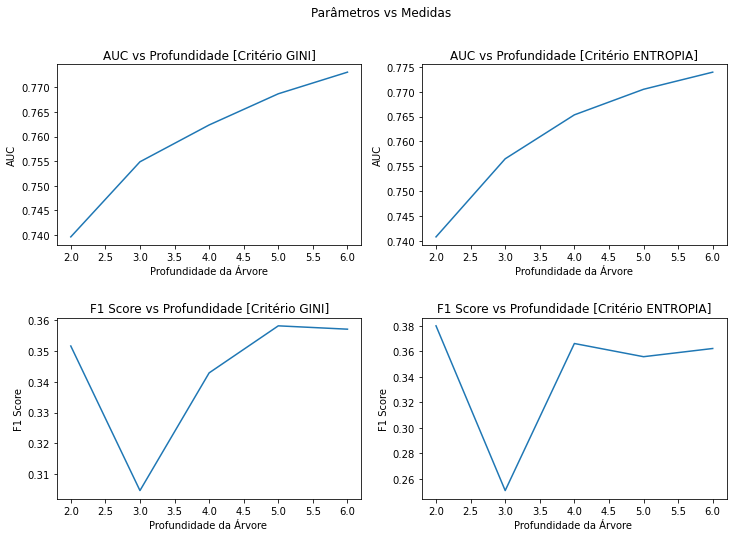

In [36]:
resultados_gini = resultados[resultados['param_criterion']=='gini']
resultados_entropia = resultados[resultados['param_criterion']=='entropy']
fig, axs = plt.subplots(2,2, figsize=(12,8))
axs[0,0].plot(resultados_gini['param_max_depth'], resultados_gini['mean_test_AUC'])
axs[0,0].set(xlabel='Profundidade da Árvore', ylabel='AUC',
       title='AUC vs Profundidade [Critério GINI]')
axs[1,0].plot(resultados_gini['param_max_depth'], abs(resultados_gini['mean_test_f1']))
axs[1,0].set(xlabel='Profundidade da Árvore ', ylabel='F1 Score',
       title='F1 Score vs Profundidade [Critério GINI]')
fig.suptitle('Parâmetros vs Medidas')
axs[0,1].plot(resultados_entropia['param_max_depth'], resultados_entropia['mean_test_AUC'])
axs[0,1].set(xlabel='Profundidade da Árvore', ylabel='AUC',
       title='AUC vs Profundidade [Critério ENTROPIA]')
axs[1,1].plot(resultados_entropia['param_max_depth'], abs(resultados_entropia['mean_test_f1']))
axs[1,1].set(xlabel='Profundidade da Árvore ', ylabel='F1 Score',
       title='F1 Score vs Profundidade [Critério ENTROPIA]')
fig.suptitle('Parâmetros vs Medidas')
plt.subplots_adjust(wspace=0.2,hspace=0.4)

In [45]:
# Calculo do f1_score nos dados de teste
# Destacando que, para calculo do f1, assume-se o corte de 0,5 no score de propensão a classe para classificacao da observacao
f1_score(y_test, clf.predict(X_test))

0.36124715345685504

In [46]:
# Calculando métricas de avaliação do modelo com base no score de propensão a classe para cada observação
y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score)

In [47]:
# Calculo do ROC AUC Score nos dados de teste
print('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_score))

ROC_AUC_SCORE:  0.7744318006161172


* Desenho da curva ROC

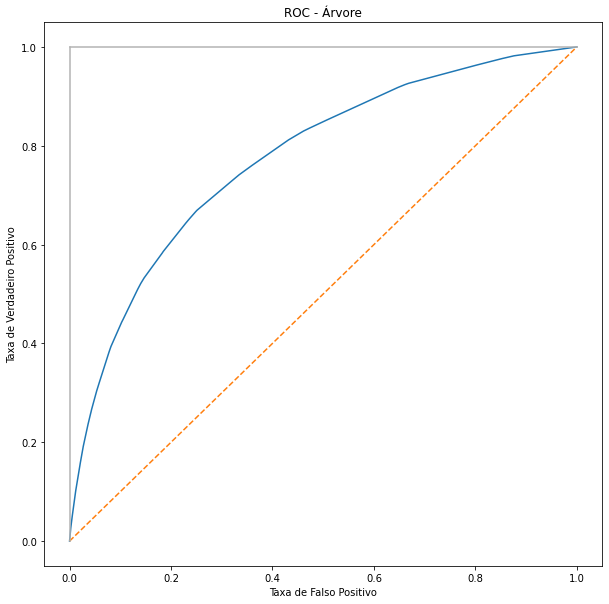

In [48]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC - Árvore')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

* Taxa de verdadeiros positivos e falsos positivos pelo score de corte na classificação da observação

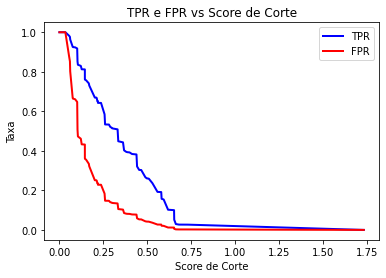

In [49]:
fig, ax = plt.subplots(1,1)
plt.title('TPR e FPR vs Score de Corte')
plt.ylabel('Taxa')
plt.xlabel('Score de Corte')
plt.plot(threshold, tpr, color='blue', linewidth=2, label = 'TPR')
plt.plot(threshold, fpr, color='red', linewidth=2, label = 'FPR')
plt.legend()

* Verificando como o score de propensao a classe de >550 se comporta para os casos de cada classe

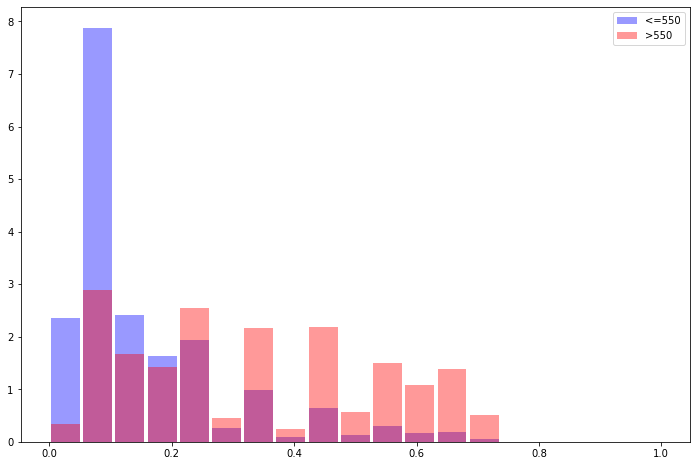

In [76]:
plt.figure(figsize=(12,8))
plt.hist(y_score[y_test['>550']==0],density=True,bins=np.linspace(0,1,20), color='b', alpha=.4, rwidth=.9, label='<=550')
plt.hist(y_score[y_test['>550']==1],density=True,bins=np.linspace(0,1,20) ,color='r', alpha=.4, rwidth=.9, label='>550');
plt.legend()
plt.show()

In [77]:
#Classificando como Nota maior que 550 as observações com score maior que 0,25 de ser desta categoria
y_score = np.where(y_score > 0.25, 1, 0)

In [78]:
#Calculando verdadeiros e falsos positivos e negativos com base no corte/classificaçao anterior
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_score).ravel()
(tn, fp, fn, tp)

(733790, 166159, 88263, 124918)

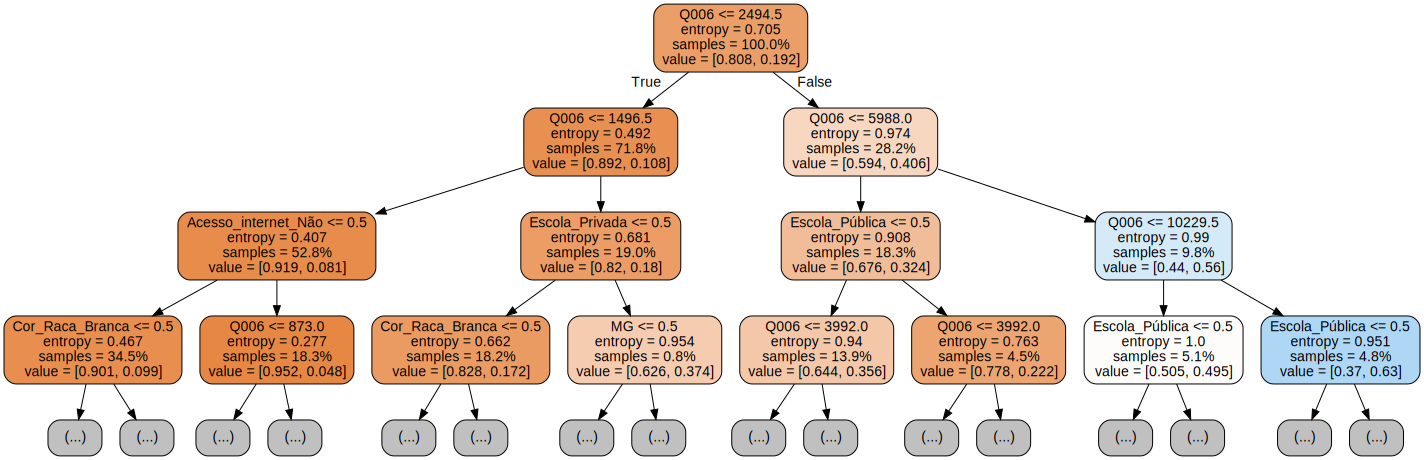

In [79]:
# Plotando a árvore do modelo, mostrando até a profundidade 3
dot_data = tree.export_graphviz(clf.best_estimator_, out_file=None, 
          feature_names=X_train.columns.values, max_depth = 3,
          filled=True, rounded=True, proportion=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
importancias = clf.best_estimator_.feature_importances_
ordem = np.argsort(importancias)[::-1]
colunas = X_train.columns

for coluna,importancia in zip(colunas[ordem],importancias[ordem]):
    print(coluna,importancia)

# Árvore de Regressão

* Modelo de Árvore empregado para problemas de predição de variáveis quantitativas
* Reune as observações em grupos mais homogêneos considerando a variável quanti, minimizando a variabilidade das observações (representado pelo erro quadrado médio - MSE)

### Árvore como método exploratório

In [80]:
df = enem[['TP_COR_RACA','SG_UF_RESIDENCIA','TP_ESCOLA','NU_NOTA_REDACAO','Q005','Q006','Q025']]
# vamos utilizar a nota de redacao como variavel resposta

In [81]:
#dropando nulos
df = df.dropna()

In [82]:
#Variável resposta
df_dep = df[['NU_NOTA_REDACAO']]
#Variaveis explicativas
df_indep = df[['TP_COR_RACA','SG_UF_RESIDENCIA','TP_ESCOLA','Q005','Q006','Q025']]

In [83]:
# Tratamentos
df_indep['TP_COR_RACA'] = df_indep['TP_COR_RACA'].map(cor_raca)
df_indep['TP_ESCOLA'] = df_indep['TP_ESCOLA'].map(tipo_escola)
df_indep['Q025'] = df_indep['Q025'].map(acesso_internet)
df_indep['Q006'] = df_indep['Q006'].map(renda_familiar)
df_indep['Q005'] = 'Mora_com' + '_' + (df.Q005.astype('str')) + '_' +'pessoas'
for x in (df_indep.select_dtypes(include=['object']).columns.tolist()):
    one_hot = pd.get_dummies(df_indep[x])
    df_indep = df_indep.drop(x,axis = 1)
    df_indep = df_indep.join(one_hot)

C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

* Ajustando uma árvore de profundidade 3

In [84]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(df_indep,df_dep)

* Novamente, observa-se que a variável renda foi significativa para separar notas maiores das menores
* A escola ser privada ou não, seguido do acesso a internet, novamente discriminaram grupos mais homogêneos

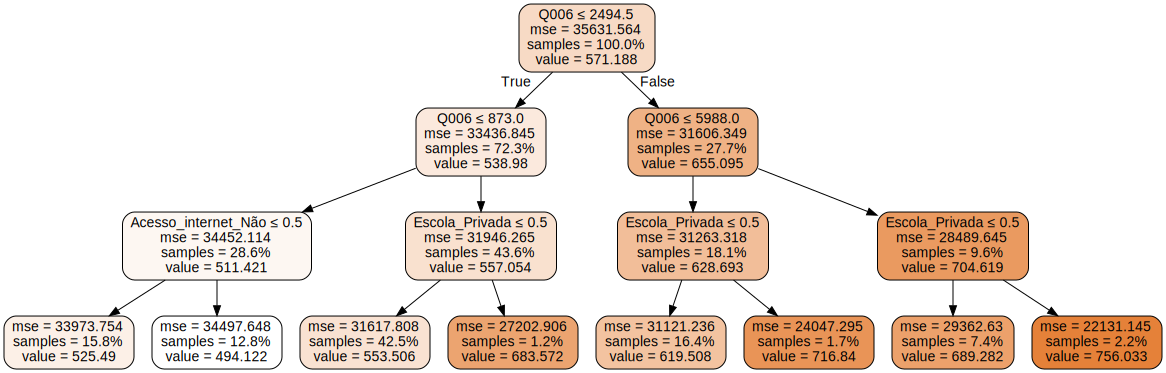

In [85]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
          feature_names=df_indep.columns.values,    
          filled=True, rounded=True,  
          special_characters=True, proportion=True)  
graph = graphviz.Source(dot_data)  
graph

### Árvore como método preditivo

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df_indep, df_dep, test_size=0.3, random_state=42)

In [88]:
parametro = {'max_depth':np.arange(2, 7,1)}
scoring = {'MSE': 'neg_mean_squared_error','R2': 'r2'}

In [89]:
clf = tree.DecisionTreeRegressor(splitter = 'best', random_state=42)
#Iterando (cross-validation) para obter o melhor hiperparâmetro com base na métrica MSE
clf = GridSearchCV(clf, parametro, scoring= scoring, refit = 'MSE', cv=10,n_jobs=-1)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6])},
             pre_dispatch='2*n_jobs', refit='MSE', return_train_score=False,
             scoring={'MSE': 'neg_mean_squared_error', 'R2': 'r

In [90]:
# A profundidade máxima que resulta no menor MSE () é de 6
print(clf.best_estimator_.max_depth)
print(clf.best_score_)

6
-31280.248862805758


In [91]:
resultados = clf.cv_results_
resultados = pd.DataFrame.from_dict(resultados)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_MSE,split1_test_MSE,split2_test_MSE,split3_test_MSE,split4_test_MSE,split5_test_MSE,split6_test_MSE,split7_test_MSE,split8_test_MSE,split9_test_MSE,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2
0,52.116896,6.053810,0.443015,0.025333,2,{'max_depth': 2},-32272.696193,-32339.685398,-32363.563835,-32065.945688,-32229.522726,-32286.327177,-32034.678010,-32169.241799,-32268.018344,-32070.380934,-32210.006010,112.493657,5,0.096504,0.095426,0.097418,0.098152,0.095508,0.096951,0.095005,0.096662,0.096583,0.095608,0.096382,0.000940,5
1,34.104402,10.335868,0.424960,0.031571,3,{'max_depth': 3},-31770.383682,-31865.279733,-31885.733107,-31582.916117,-31745.913417,-31797.296084,-31563.711336,-31676.284350,-31773.667115,-31573.691195,-31723.487614,112.717503,4,0.110567,0.108696,0.110744,0.111738,0.109080,0.110629,0.108310,0.110505,0.110423,0.109615,0.110031,0.001013,4
2,43.991198,3.972841,0.383474,0.055641,4,{'max_depth': 4},-31529.069373,-31628.401793,-31650.467629,-31346.621703,-31513.169934,-31554.365331,-31311.707500,-31433.753991,-31534.221072,-31342.524156,-31484.430248,114.023965,3,0.117322,0.115321,0.117306,0.118383,0.115612,0.117424,0.115430,0.117315,0.117127,0.116134,0.116737,0.000984,3
3,49.144810,3.343902,0.380582,0.040738,5,{'max_depth': 5},-31401.356157,-31496.183488,-31527.278255,-31210.763140,-31368.076234,-31419.840706,-31189.530241,-31306.573904,-31404.954723,-31220.679777,-31354.523663,112.783642,2,0.120898,0.119020,0.120741,0.122204,0.119684,0.121186,0.118881,0.120887,0.120746,0.119570,0.120382,0.001000,2
4,46.969441,6.191706,0.215811,0.100205,6,{'max_depth': 6},-31326.848360,-31428.423670,-31459.151413,-31129.571915,-31290.046437,-31335.457396,-31120.139285,-31230.971305,-31339.395800,-31142.483045,-31280.248863,115.118227,1,0.122984,0.120915,0.122641,0.124488,0.121874,0.123547,0.120842,0.123010,0.122582,0.121775,0.122466,0.001083,1


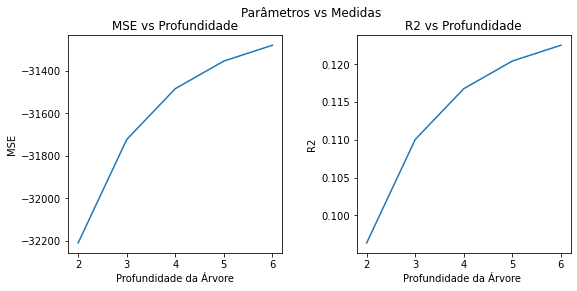

In [92]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_max_depth'], resultados['mean_test_MSE'])
axs[0].set(xlabel='Profundidade da Árvore', ylabel='MSE',
       title='MSE vs Profundidade')
axs[1].plot(resultados['param_max_depth'], abs(resultados['mean_test_R2']))
axs[1].set(xlabel='Profundidade da Árvore ', ylabel='R2',
       title='R2 vs Profundidade')
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)

In [96]:
y_predict = clf.predict(X_test)

In [103]:
print(mean_squared_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

31253.578774039262
0.12205153786260192


In [109]:
y_test

,NU_NOTA_REDACAO
4789756,840.0
2134862,640.0
3340037,300.0
1179093,780.0
2202268,700.0
...,...
4351523,900.0
1360379,480.0
4913470,740.0
3572944,520.0


In [117]:
erros = y_predict - y_test['NU_NOTA_REDACAO']

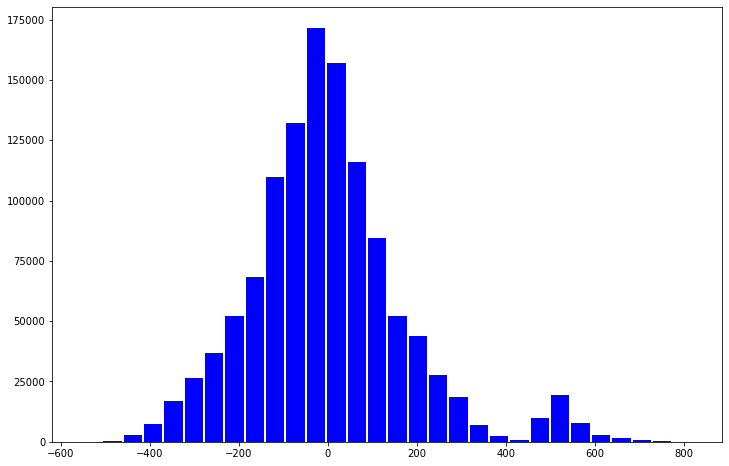

In [151]:
plt.figure(figsize=(12,8))
plt.hist(erros,density=False,bins=30, color='b',rwidth=.9)
plt.show()

In [126]:
print(y_train['NU_NOTA_REDACAO'].mean())
print(st.median(y_train['NU_NOTA_REDACAO']))

571.0915519627121
580.0


In [140]:
modelos_base = pd.DataFrame(columns=['media','mediana'])

In [141]:
modelos_base['media'] = np.repeat(571.1, len(y_test))
modelos_base['mediana'] = np.repeat(580, len(y_test))

In [149]:
print(mean_squared_error(y_test, modelos_base['media']))
print(mean_squared_error(y_test, modelos_base['mediana']))

35598.51949985723
35672.13665221115
